<h1><center>HW6</center></h1>

<h1><center>CAP 5610</center></h1>

<h1><center>Kazi Redwan Shabab</center></h1>

# Game Data

In [350]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import metrics
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from copy import deepcopy
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [291]:
df1=pd.read_csv(r'C:\Users\redwi\Downloads\Spring 20\CAP ML\hw6.csv')

In [292]:
df1

,Teans,Wins in Season 2016,Wins in Season 2017
0,X1,3,5
1,X2,3,4
2,X3,2,8
3,X4,2,3
4,X5,6,2
5,X6,6,4
6,X7,7,3
7,X8,7,4
8,X9,8,5
9,X10,7,6


In [293]:
A=df1.iloc[:, [1,2]].values
A=np.array(A)

In [294]:
from sklearn.cluster import KMeans

In [295]:
WCSS=[]

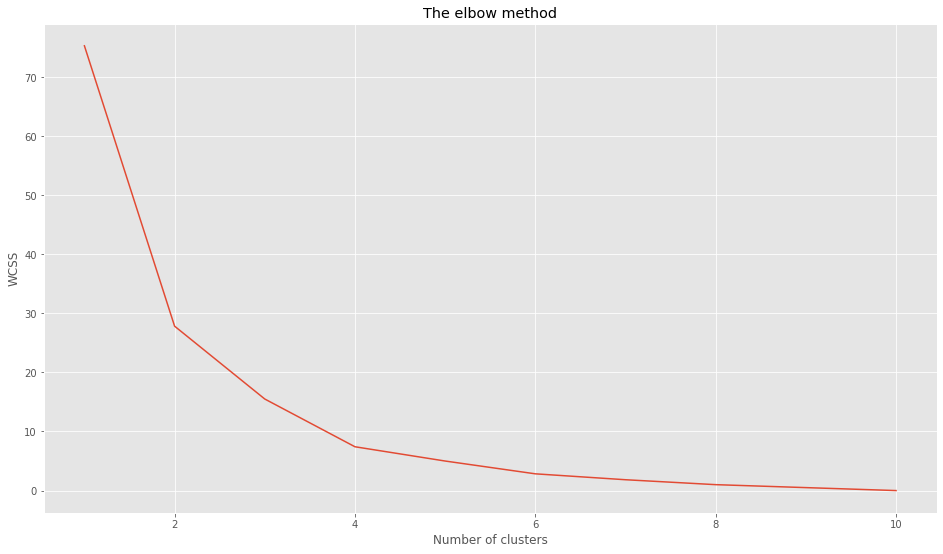

In [296]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init= 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(A)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [297]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(A)

In [298]:
y_kmeans

array([2, 2, 1, 2, 0, 0, 0, 0, 3, 3])

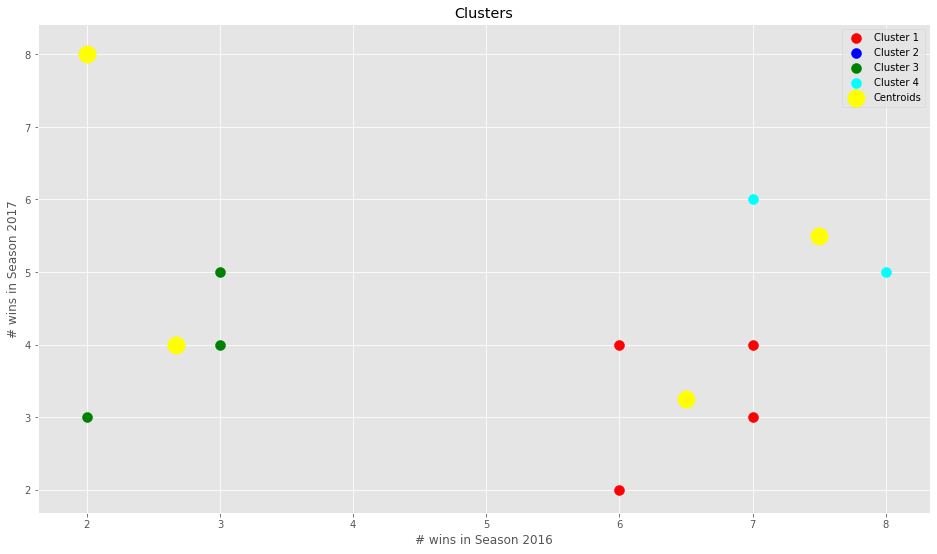

In [299]:
plt.scatter(A[y_kmeans==0,0],A[y_kmeans==0,1],s = 100, c = 'red', label = 'Cluster 1' )
plt.scatter(A[y_kmeans==1,0],A[y_kmeans==1,1],s = 100, c = 'blue', label = 'Cluster 2' )
plt.scatter(A[y_kmeans==2,0],A[y_kmeans==2,1],s = 100, c = 'green', label = 'Cluster 3' )
plt.scatter(A[y_kmeans==3,0],A[y_kmeans==3,1],s = 100, c = 'cyan', label = 'Cluster 4' )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('# wins in Season 2016')
plt.ylabel('# wins in Season 2017')
plt.legend()
plt.show()

In [300]:
X= df1['Wins in Season 2016']

In [301]:
Y=df1['Wins in Season 2017']

In [302]:
a1 = (4, 6)
a2 = (5, 4)

In [303]:
import numpy as np
def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [304]:
df1['A1_Distance'] = calculate_distance(a1, X, Y)
df1['A2_Distance'] = calculate_distance(a2, X, Y)

In [305]:
df1

,Teans,Wins in Season 2016,Wins in Season 2017,A1_Distance,A2_Distance
0,X1,3,5,1.414214,2.236068
1,X2,3,4,2.236068,2.000000
2,X3,2,8,2.828427,5.000000
3,X4,2,3,3.605551,3.162278
4,X5,6,2,4.472136,2.236068
5,X6,6,4,2.828427,1.000000
6,X7,7,3,4.242641,2.236068
7,X8,7,4,3.605551,2.000000
8,X9,8,5,4.123106,3.162278
9,X10,7,6,3.000000,2.828427


In [306]:
df1['Cluster'] = df1[['A1_Distance', 'A2_Distance']].apply(np.argmin, axis =1)
df1

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


,Teans,Wins in Season 2016,Wins in Season 2017,A1_Distance,A2_Distance,Cluster
0,X1,3,5,1.414214,2.236068,A1_Distance
1,X2,3,4,2.236068,2.000000,A2_Distance
2,X3,2,8,2.828427,5.000000,A1_Distance
3,X4,2,3,3.605551,3.162278,A2_Distance
4,X5,6,2,4.472136,2.236068,A2_Distance
5,X6,6,4,2.828427,1.000000,A2_Distance
6,X7,7,3,4.242641,2.236068,A2_Distance
7,X8,7,4,3.605551,2.000000,A2_Distance
8,X9,8,5,4.123106,3.162278,A2_Distance
9,X10,7,6,3.000000,2.828427,A2_Distance


In [307]:
 df1['Cluster'] = df1['Cluster'].map({'A1_Distance': 'A1', 'A2_Distance': 'A2'})

In [308]:
df1

,Teans,Wins in Season 2016,Wins in Season 2017,A1_Distance,A2_Distance,Cluster
0,X1,3,5,1.414214,2.236068,A1
1,X2,3,4,2.236068,2.000000,A2
2,X3,2,8,2.828427,5.000000,A1
3,X4,2,3,3.605551,3.162278,A2
4,X5,6,2,4.472136,2.236068,A2
5,X6,6,4,2.828427,1.000000,A2
6,X7,7,3,4.242641,2.236068,A2
7,X8,7,4,3.605551,2.000000,A2
8,X9,8,5,4.123106,3.162278,A2
9,X10,7,6,3.000000,2.828427,A2


In [309]:
from math import*

def calculate_manhattan_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the given formula
    for x, y in list(zip(X, Y)):
        diff_x = abs(x - c_x) 
        diff_y = abs(y - c_y) 
        distance = (diff_x + diff_y)
        distances.append(distance)
        
    return distances

In [310]:
df2=pd.read_csv(r'C:\Users\redwi\Downloads\Spring 20\CAP ML\hw6.csv')

In [311]:
b1 = (4, 6)
b2 = (5, 4)

In [312]:
df2['B1_Distance'] = calculate_manhattan_distance(b1, X, Y)
df2['B2_Distance'] = calculate_manhattan_distance(b2, X, Y)

In [313]:
df2['Cluster'] = df2[['B1_Distance', 'B2_Distance']].apply(np.argmin, axis =1)
df2

,Teans,Wins in Season 2016,Wins in Season 2017,B1_Distance,B2_Distance,Cluster
0,X1,3,5,2,3,B1_Distance
1,X2,3,4,3,2,B2_Distance
2,X3,2,8,4,7,B1_Distance
3,X4,2,3,5,4,B2_Distance
4,X5,6,2,6,3,B2_Distance
5,X6,6,4,4,1,B2_Distance
6,X7,7,3,6,3,B2_Distance
7,X8,7,4,5,2,B2_Distance
8,X9,8,5,5,4,B2_Distance
9,X10,7,6,3,4,B1_Distance


In [314]:
df2['Cluster'] = df2['Cluster'].map({'B1_Distance': 'A1', 'B2_Distance': 'A2'})

In [315]:
df2

,Teans,Wins in Season 2016,Wins in Season 2017,B1_Distance,B2_Distance,Cluster
0,X1,3,5,2,3,A1
1,X2,3,4,3,2,A2
2,X3,2,8,4,7,A1
3,X4,2,3,5,4,A2
4,X5,6,2,6,3,A2
5,X6,6,4,4,1,A2
6,X7,7,3,6,3,A2
7,X8,7,4,5,2,A2
8,X9,8,5,5,4,A2
9,X10,7,6,3,4,A1


In [316]:
df3=pd.read_csv(r'C:\Users\redwi\Downloads\Spring 20\CAP ML\hw6.csv')

In [317]:
c1 = (3, 3)
c2 = (8, 3)

In [318]:
df3['C1_Distance'] = calculate_manhattan_distance(c1, X, Y)
df3['C2_Distance'] = calculate_manhattan_distance(c2, X, Y)

In [319]:
df3['Cluster'] = df3[['C1_Distance', 'C2_Distance']].apply(np.argmin, axis =1)

In [320]:
df3['Cluster'] = df3['Cluster'].map({'C1_Distance': 'A1', 'C2_Distance': 'A2'})

In [321]:
df3

,Teans,Wins in Season 2016,Wins in Season 2017,C1_Distance,C2_Distance,Cluster
0,X1,3,5,2,7,A1
1,X2,3,4,1,6,A1
2,X3,2,8,6,11,A1
3,X4,2,3,1,6,A1
4,X5,6,2,4,3,A2
5,X6,6,4,4,3,A2
6,X7,7,3,4,1,A2
7,X8,7,4,5,2,A2
8,X9,8,5,7,2,A2
9,X10,7,6,7,4,A2


In [322]:
df4=pd.read_csv(r'C:\Users\redwi\Downloads\Spring 20\CAP ML\hw6.csv')

In [323]:
d1 = (3, 2)
d2 = (4, 8)

In [324]:
df4['D1_Distance'] = calculate_manhattan_distance(d1, X, Y)
df4['D2_Distance'] = calculate_manhattan_distance(d2, X, Y)

In [325]:
df4['Cluster'] = df4[['D1_Distance', 'D2_Distance']].apply(np.argmin, axis =1)

In [326]:
df4['Cluster'] = df4['Cluster'].map({'D1_Distance': 'A1', 'D2_Distance': 'A2'})

In [327]:
df4

,Teans,Wins in Season 2016,Wins in Season 2017,D1_Distance,D2_Distance,Cluster
0,X1,3,5,3,4,A1
1,X2,3,4,2,5,A1
2,X3,2,8,7,2,A2
3,X4,2,3,2,7,A1
4,X5,6,2,3,8,A1
5,X6,6,4,5,6,A1
6,X7,7,3,5,8,A1
7,X8,7,4,6,7,A1
8,X9,8,5,8,7,A2
9,X10,7,6,8,5,A2


In [328]:
f1= df1['Wins in Season 2016'].values

In [329]:
f2=df1['Wins in Season 2017'].values

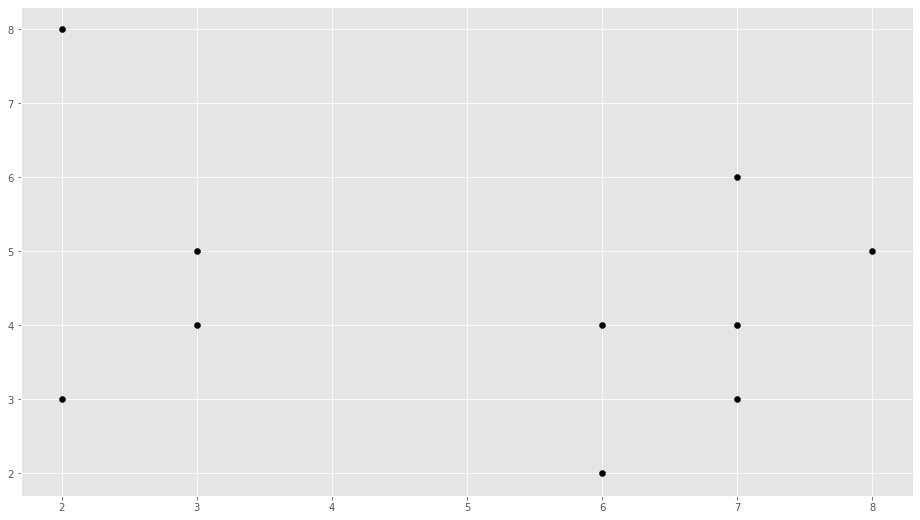

In [330]:
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black')

In [331]:
k=2
a1=(4,5)
a2=(6,4)
C = np.array(list(zip(a1, a2)), dtype=np.float32)

In [332]:
def manhattan(a, b, ax=1):
    return np.sum(np.abs(a-b), axis=ax)

def euclidean(a, b, ax=1):
    return np.sum((a-b)**2, axis=ax)
#     return (a-b)

def cosine(a,b, ax=1):
    val = 1- np.dot(a,b) /(np.linalg.norm(a))*np.sum(np.linalg.norm(b))
#     print(val)
    return val

def jaccard(a, b, ax=1):
    return (1-np.sum(np.minimum(a,b),axis=ax)/np.sum(np.maximum(a,b),axis=ax))

distMetric = {"manhattan":0, "euclidean":1, "cosine":2, "jaccard":3}
metrics = {
        distMetric['manhattan']: manhattan,
        distMetric['euclidean']: euclidean,
        distMetric['cosine']: cosine,
        distMetric['jaccard']: jaccard
    }
def sse(X, clusters, C, metric=euclidean):
    sseVal = 0
    for i, centroid in enumerate(C):
        sseVal += np.sum(metric(X[np.where(clusters==i)], centroid))
    
    return sseVal

In [333]:
maxIT = 100

def kmeans(X, C=C, k=2, metric=distMetric['manhattan'], max_iter= maxIT):
    np.random.seed(99)
    
    if C is None:
        C = X[np.random.choice(len(X), size=k, replace=False)]
    # To store the value of centroids when it updates
    C_old = np.ones(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
#     print(C)
#     print(C_old)
    
    metrics = {
        distMetric['manhattan']: manhattan,
        distMetric['euclidean']: euclidean,
        distMetric['cosine']: cosine,
        distMetric['jaccard']: jaccard
    }
    
    error = metrics[metric](C, C_old, None)
    # Loop will run till the error becomes zero
#     print(error)
    error = np.array(error)
    count = 1
    prev_sse = 0
    curr_sse = 0
    while error.any() != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
#             print(X[i])
#             print(C)
            distances = metrics[metric](X[i], C)
#             print(distances)
            cluster = np.argmin([distances])
#             print(cluster)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        curr_sse = sse(X, clusters, C)
        print('Iteration: {}'.format(count))
        print('Current SSE: {}'.format(curr_sse))
        print('Previous SSE: {}'.format(prev_sse))
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
#             print(points)
            C[i] = np.mean(points, axis=0) 
#         print(C)
        error_old = deepcopy(error)
        error = metrics[metric](C, C_old, None)
        if count>0:
            if np.sum(error_old) == np.sum(error):
                break
        if count>max_iter+1:
            break
        count = count+1
        prev_sse = curr_sse
    return clusters, count

Iteration: 1
Current SSE: 58.0
Previous SSE: 0
Iteration: 2
Current SSE: 54.09523809523847
Previous SSE: 58.0
3


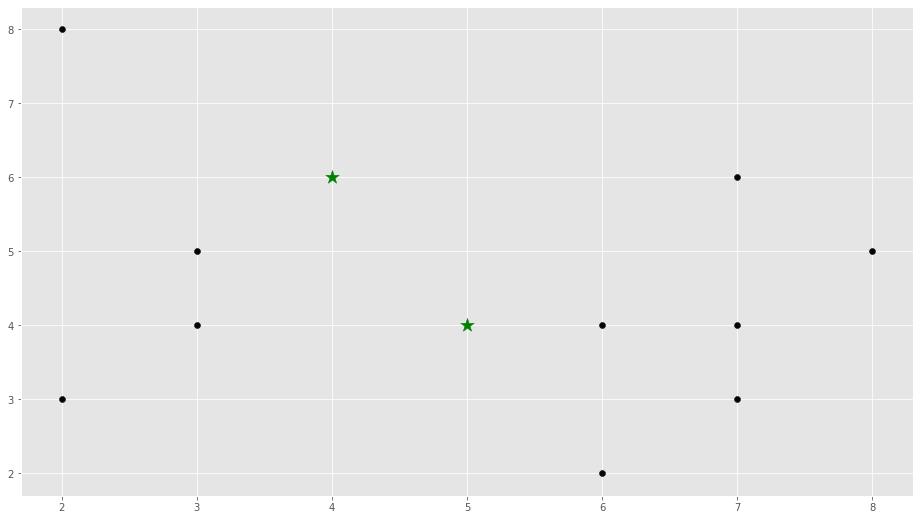

In [334]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(a1, a2, marker='*', s=200, c='g')

clusters, count = kmeans(X, C=C, k=2, metric=distMetric['manhattan'], max_iter= 100)
print(count)

[0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


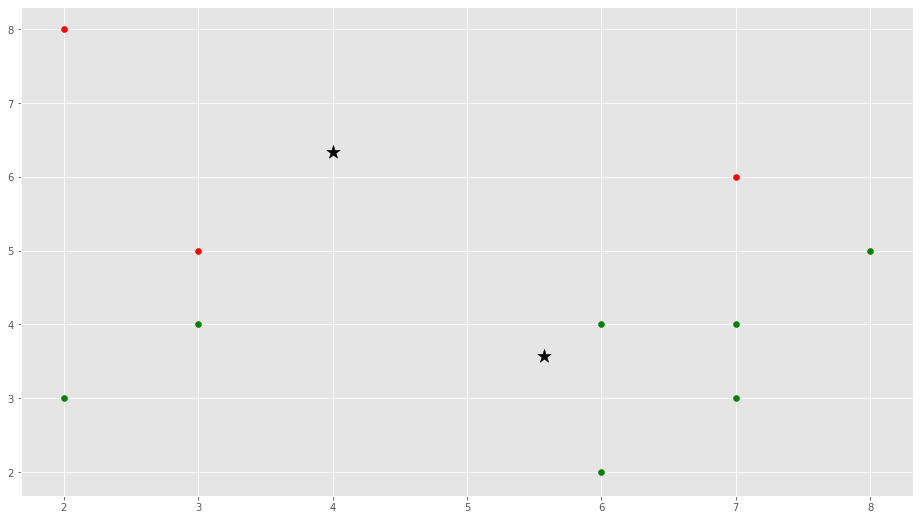

In [335]:
k=2
print(clusters)
colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Iteration: 1
Current SSE: 57.0
Previous SSE: 0
Iteration: 2
Current SSE: 43.96875
Previous SSE: 57.0
Iteration: 3
Current SSE: 27.833333333333485
Previous SSE: 43.96875


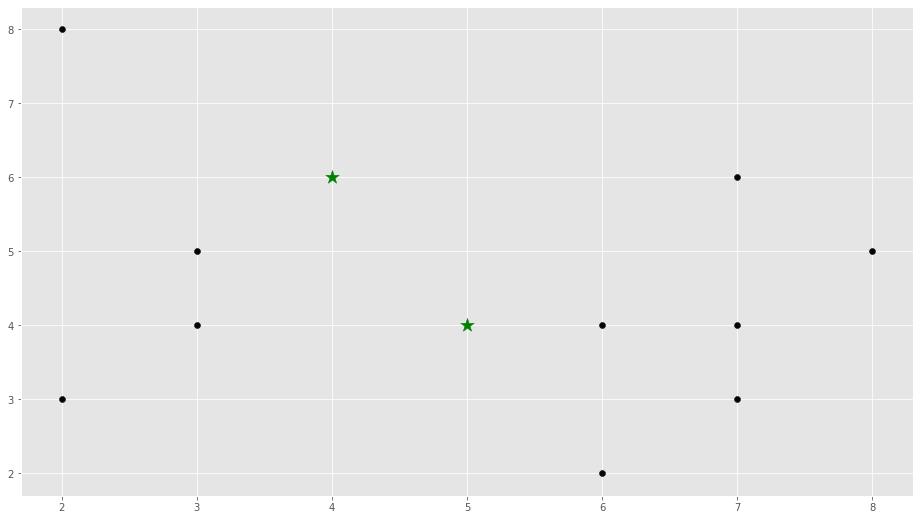

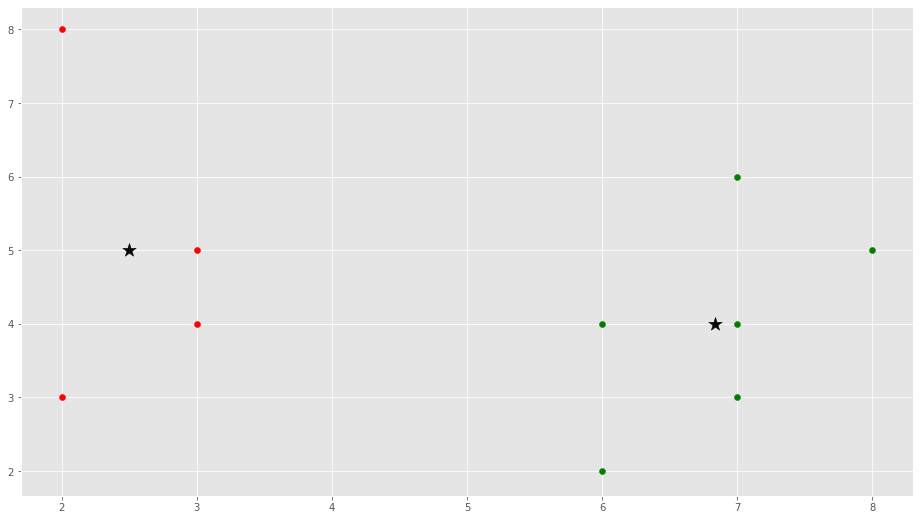

In [336]:
# Number of clusters
k = 2
# X coordinates of random centroids
b1 = [4,5]
# Y coordinates of random centroids
b2 = [6,4]
C = np.array(list(zip(b1, b2)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(b1, b2, marker='*', s=200, c='g')

clusters,count = kmeans(X, C=C, k=2, metric=distMetric['euclidean'])
# print(clusters)

colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Iteration: 1
Current SSE: 59.0
Previous SSE: 0
Iteration: 2
Current SSE: 27.833333333333485
Previous SSE: 59.0


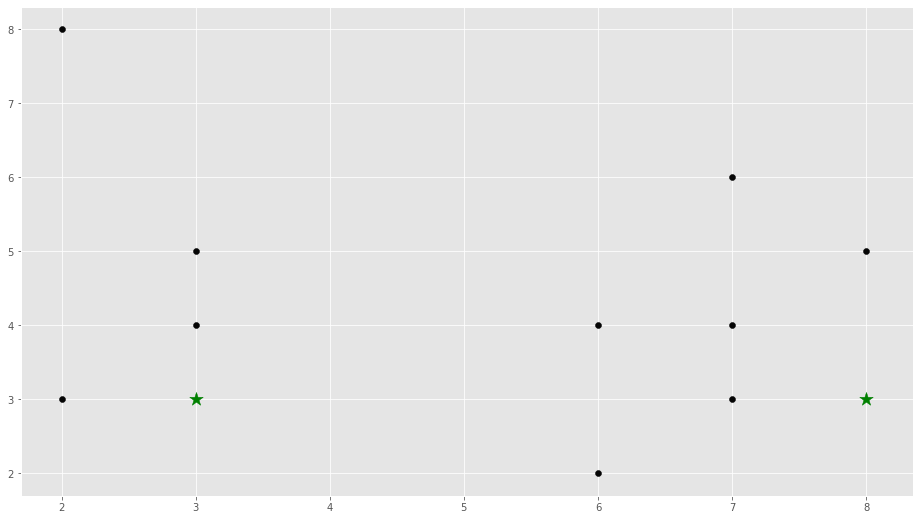

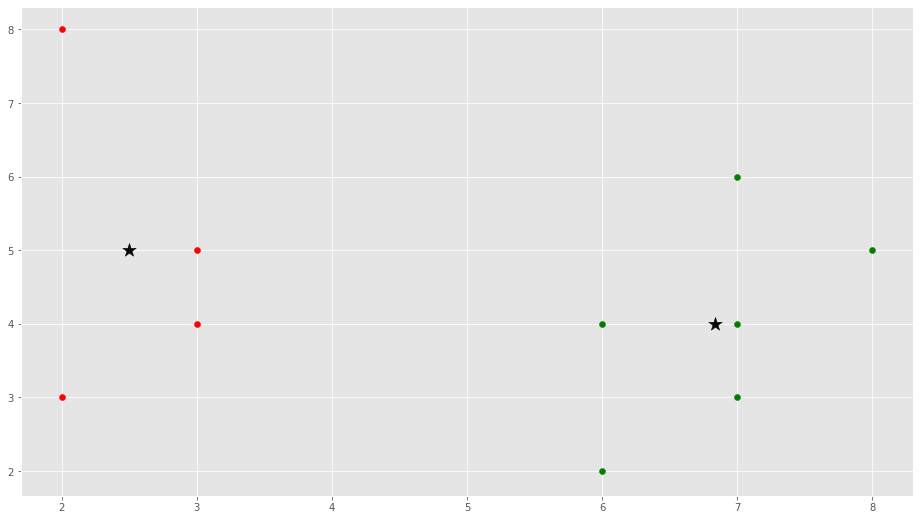

In [337]:
# Number of clusters
k = 2
# X coordinates of random centroids
c1 = [3,8]
# Y coordinates of random centroids
c2 = [3,3]
C = np.array(list(zip(c1, c2)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(c1, c2, marker='*', s=200, c='g')

clusters,count = kmeans(X, C=C, k=2, metric=distMetric['manhattan'])

colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Iteration: 1
Current SSE: 116.0
Previous SSE: 0
Iteration: 2
Current SSE: 57.9047619047621
Previous SSE: 116.0


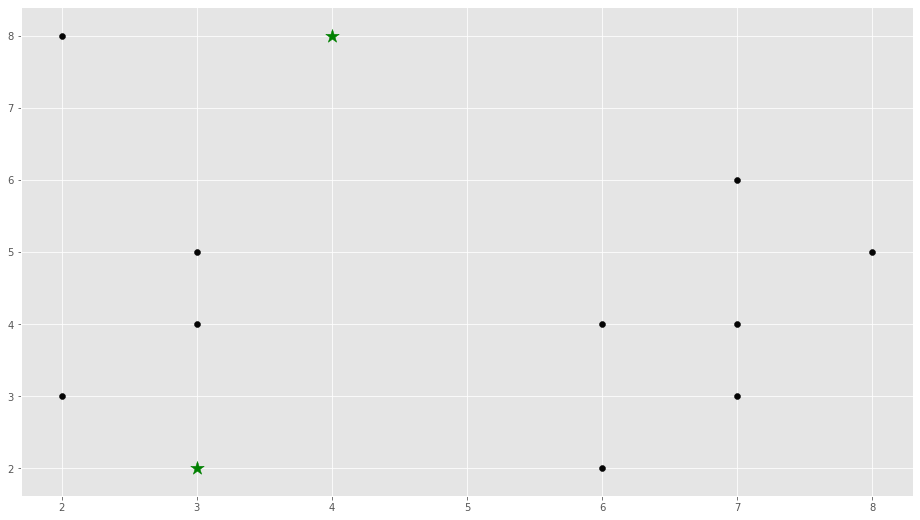

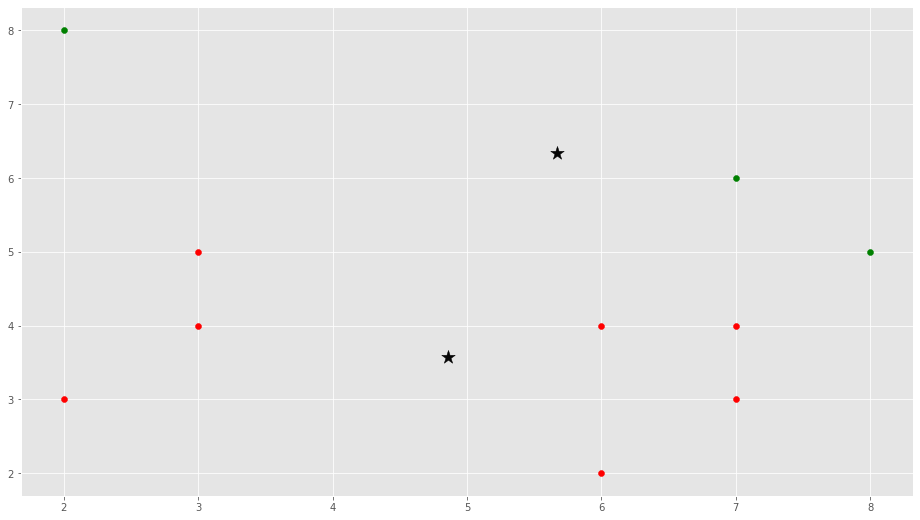

In [338]:
# Number of clusters
k = 2
# X coordinates of random centroids
d1 = [3,4]
# Y coordinates of random centroids
d2 = [2,8]
C = np.array(list(zip(d1, d2)), dtype=np.float32)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505')
plt.scatter(d1, d2, marker='*', s=200, c='g')

clusters,count = kmeans(X, C=C, k=2, metric=distMetric['manhattan'])

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
#         print(points)
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# Iris Data

In [339]:
df = pd.read_csv(r'C:\Users\redwi\Downloads\Spring 20\CAP ML\hw5\iris.data', sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

In [340]:
# Converting the predicted label "class" to numerical values
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [341]:
X = df[df.columns[:-1]].values

In [342]:
clusters, count = kmeans(X, C=None, k=3, metric=distMetric['euclidean'], max_iter= maxIT)
print(count)

Iteration: 1
Current SSE: 122.05999999999997
Previous SSE: 0
Iteration: 2
Current SSE: 79.73793139920596
Previous SSE: 122.05999999999997
Iteration: 3
Current SSE: 78.91880877308478
Previous SSE: 79.73793139920596
4


In [343]:
def predict(clusters, y, k=3):
    indexes = []
    for i in range(k):
        indexes.append(np.where(clusters == i))
    for cluster in indexes:
        mode = int(stats.mode(y[cluster])[0])
        clusters[cluster] = mode
        
    return clusters

In [344]:
from sklearn import metrics
pred_val = predict(clusters, df['class'].values)
metrics.accuracy_score(df['class'].values, pred_val)

0.8926174496644296

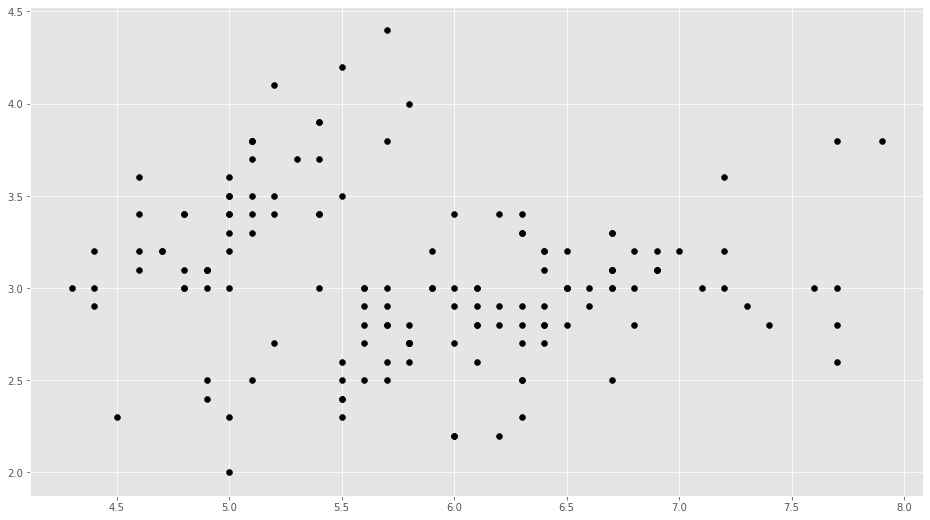

In [345]:
plt.scatter(X[:, 0], X[:, 1], c='black')
# plt.scatter(X[:, 1], X[:, 2], c='black')

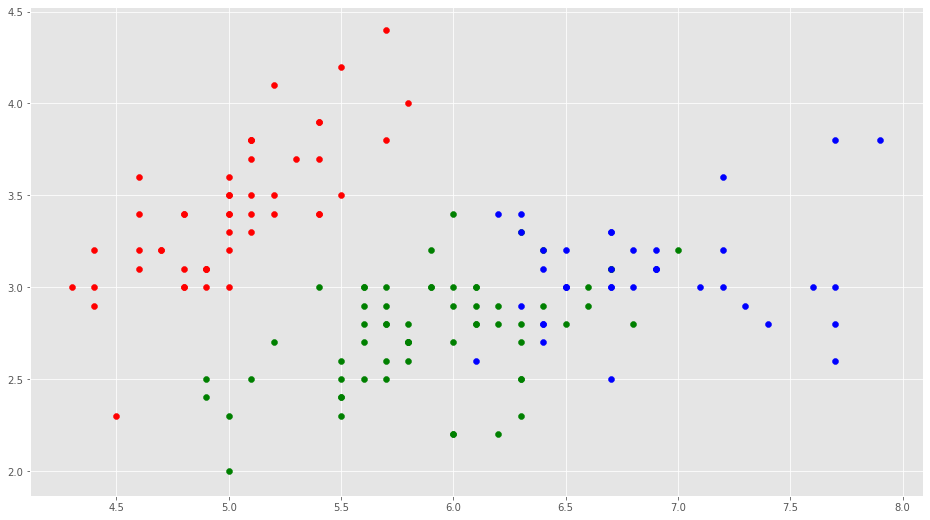

In [346]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#         ax.scatter(points[:, 1], points[:, 2], c=colors[i])
# ax.scatter(C, marker='*', s=200, c='#050505')
# print(len(points))

In [347]:
clusters,count = kmeans(X, C=None, k=3, metric=distMetric['jaccard'], max_iter= maxIT)
print(count)

Iteration: 1
Current SSE: 123.13999999999996
Previous SSE: 0
Iteration: 2
Current SSE: 80.18347776360544
Previous SSE: 123.13999999999996
Iteration: 3
Current SSE: 79.35680571078552
Previous SSE: 80.18347776360544
Iteration: 4
Current SSE: 79.16471709226985
Previous SSE: 79.35680571078552
5


In [348]:
pred_val = predict(clusters, df['class'].values)
accurcy = metrics.accuracy_score(df['class'].values, clusters)
print(accurcy)

0.8791946308724832


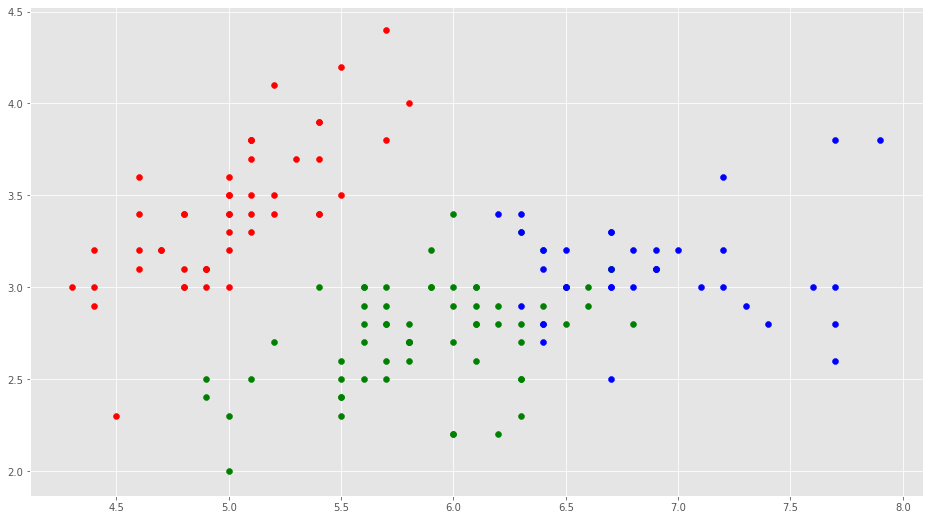

In [349]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
#         ax.scatter(points[:, 1], points[:, 2], c=colors[i])
# ax.scatter(C, marker='*', s=200, c='#050505')
# print(len(points))